In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import soundfile as sf
import librosa as lb
import librosa.display
from pathlib import Path
from tqdm import tqdm
import PIL
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Dense


In [2]:
# actual_bird_names = ['Arctic Tern', 'Black-bellied Plover']
birds = np.array(['arcter', 'bkbplo'])

In [3]:
bird_mappings = {item: i for i, item in enumerate(np.unique(birds))}
bird_mappings

{'arcter': 0, 'bkbplo': 1}

In [4]:
PATH = Path('train_audio')
im_path = Path('images')

fig, ax = plt.subplots()

for b in birds:
    current_path = PATH.joinpath(b)
    bird_path = im_path.joinpath(b)
    bird_path.mkdir(exist_ok=True)
    counter = 0
    
    print(f'Currently loading {b} bird')
    for file in current_path.iterdir():
        if counter != 0 and counter % 50 == 0:
            break
        data, sampling_rate = lb.load(file)
        if data.ndim > 1:
            data = data[:, 0]
        S = lb.feature.melspectrogram(y=data, sr=sampling_rate)
        S_db = lb.power_to_db(S, ref=np.max)
        img = lb.display.specshow(S_db, x_axis='time', y_axis='linear', ax=ax)
        fig.subplots_adjust(left=0,right=1,bottom=0,top=1)
        ax.axis('tight')
        ax.axis('off')
        fig.savefig(bird_path.joinpath(f'img_{counter}'))
        plt.close()
        counter += 1
        

Currently loading arcter bird
Currently loading bkbplo bird


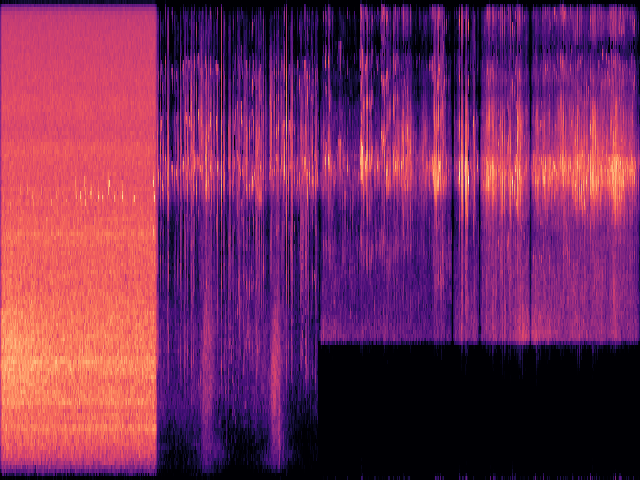

In [7]:
PIL.Image.open('images/bkbplo/img_0.png')